In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
fasted_base = "data_controlled_temp/fasted/"
satiated_base = "data_controlled_temp/satiated/"

# fasted_base = "data/fasted/"
# satiated_base = "data/satiated/"


(2000, 13)


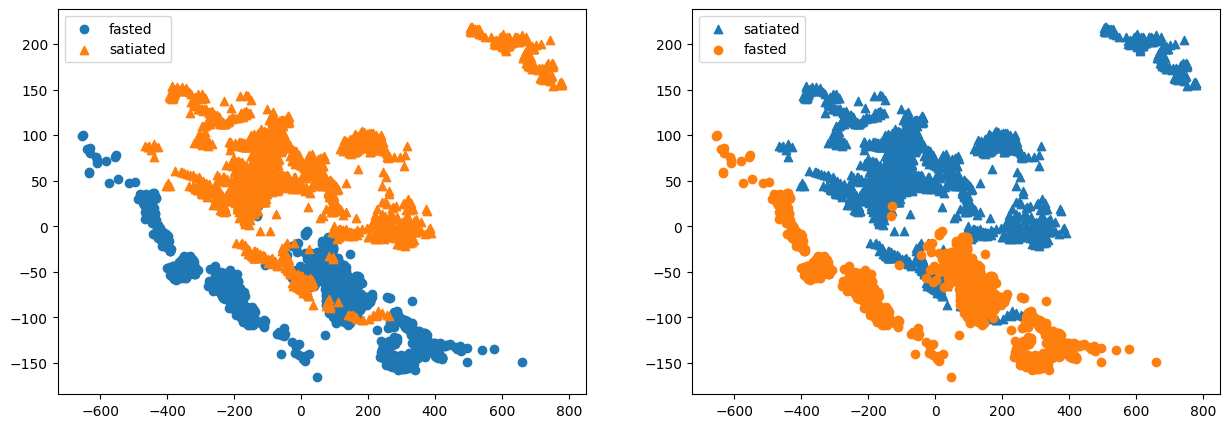

[0.89104091 0.09387885]


In [7]:
def get_data(base):
    data = []
    for i, filename in enumerate(sorted(os.listdir(base))):
        data.append(np.loadtxt(base + filename, skiprows=1, delimiter=',')[:, 6:])
    return data

fasted_data = get_data(fasted_base)
satiated_data = get_data(satiated_base)

all_fasted_data = np.concatenate(fasted_data)
all_satiated_data = np.concatenate(satiated_data)

all_data = np.concatenate((all_fasted_data, all_satiated_data))

print(all_fasted_data.shape)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(all_data)

fasted_transformed = pca.transform(all_fasted_data)
satiated_transformed = pca.transform(all_satiated_data)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)

plt.scatter(fasted_transformed[:, 0], fasted_transformed[:, 1], marker='o', label='fasted')
plt.scatter(satiated_transformed[:, 0], satiated_transformed[:, 1], marker='^', label='satiated')
plt.legend()

plt.subplot(1, 2, 2)

plt.scatter(satiated_transformed[:, 0], satiated_transformed[:, 1], marker='^', label='satiated')
plt.scatter(fasted_transformed[:, 0], fasted_transformed[:, 1], marker='o', label='fasted')
plt.legend()

plt.show()

print(pca.explained_variance_ratio_)
